In [12]:
#Final Project - Group Members: Alyssa Parr, Chenlei Zhu, Sarah Perumattam

In [13]:
# load libraries
library(lubridate)
library(stringr)
library(dplyr)
library(ggplot2)
library(broom)

# load datasets
happiness_df <- read.csv("happiness-cantril-ladder.csv")
DALYs_df <- read.csv("total-disease-burden.csv")
controls_df <- read.csv("control-variables.csv")

# merge datasets
merged_sets <- merge(happiness_df, DALYs_df, by = c("Code", "Year"))

# use filter() to create new dataframe with 2019 data only
merged_sets_2019 <- merged_sets %>% 
    filter(Year == "2019") 

# merge control variables
final_df <- merge(merged_sets_2019, controls_df, by = "Code")

# count number of countries included
nrow(final_df)


[1] 145

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


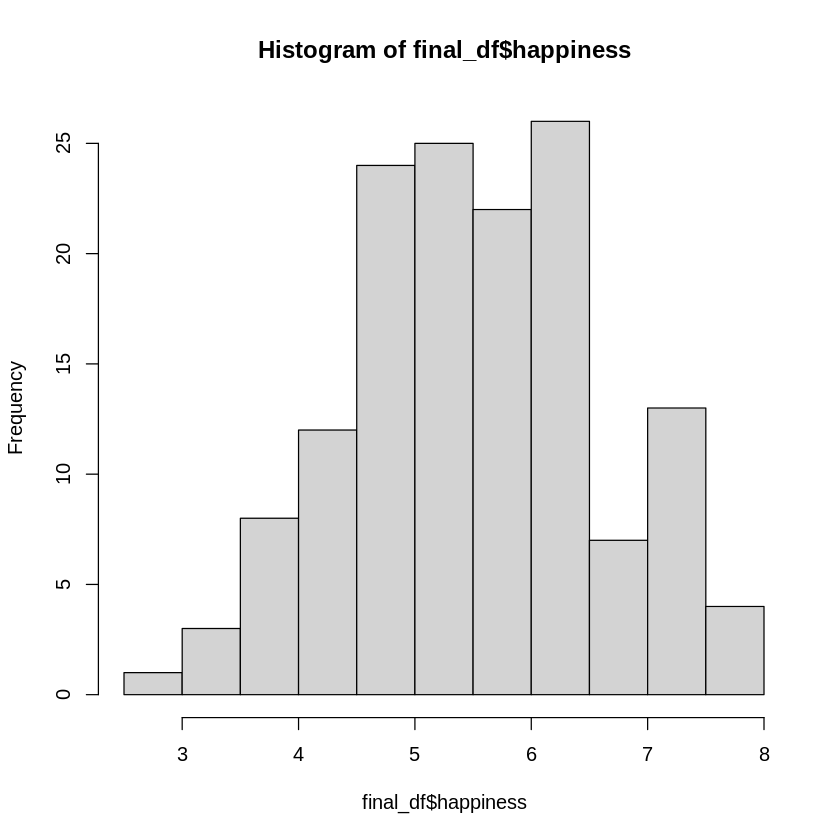

     Code                Year        Entity.x           happiness    
 Length:145         Min.   :2019   Length:145         Min.   :2.523  
 Class :character   1st Qu.:2019   Class :character   1st Qu.:4.834  
 Mode  :character   Median :2019   Mode  :character   Median :5.477  
                    Mean   :2019                      Mean   :5.520  
                    3rd Qu.:2019                      3rd Qu.:6.223  
                    Max.   :2019                      Max.   :7.842  
                                                                     
   Entity.y             DALYs       Country.Name           income       
 Length:145         Min.   :15045   Length:145         Min.   :  204.2  
 Class :character   1st Qu.:22749   Class :character   1st Qu.: 1675.5  
 Mode  :character   Median :28375   Mode  :character   Median : 5165.6  
                    Mean   :32856                      Mean   :11866.1  
                    3rd Qu.:40990                      3rd Qu.:14712.1  
  

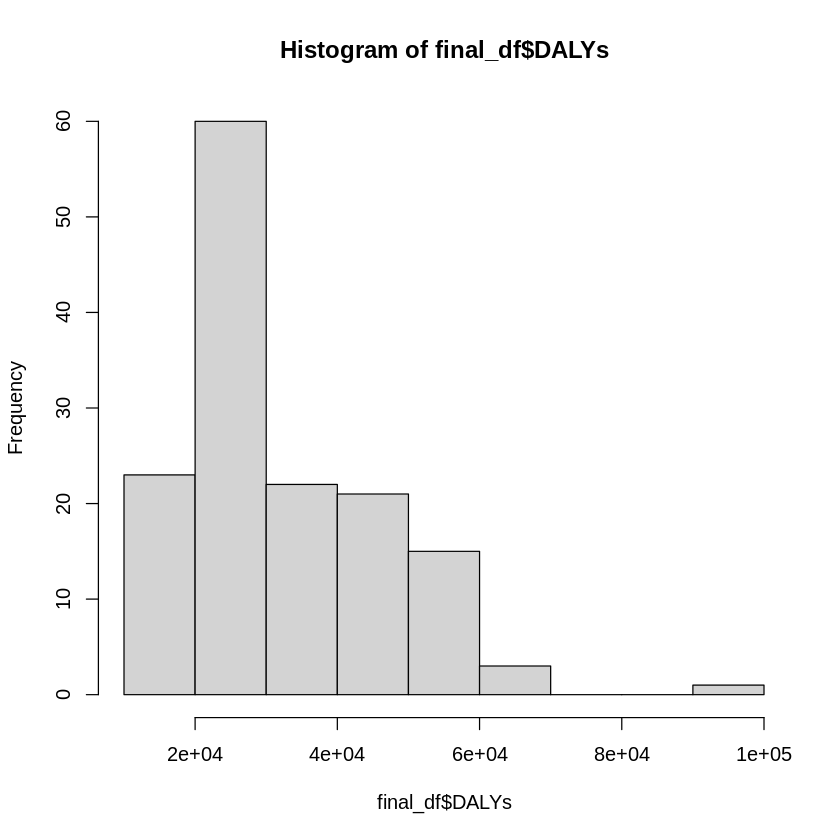


Call:
lm(formula = happiness ~ DALYs, data = final_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69506 -0.48031 -0.00491  0.58595  1.55528 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.416e+00  1.613e-01   45.99   <2e-16 ***
DALYs       -5.770e-05  4.533e-06  -12.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.744 on 143 degrees of freedom
Multiple R-squared:  0.5312,	Adjusted R-squared:  0.5279 
F-statistic:   162 on 1 and 143 DF,  p-value: < 2.2e-16


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.415984e+00,1.612558e-01,45.98895,1.422378e-87
DALYs,-5.770032e-05,4.533299e-06,-12.72811,2.734664e-25


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.023080e+00,7.909161e-01,8.87967769,2.230988e-10
DALYs,-4.901365e-05,2.142471e-05,-2.28771623,2.849740e-02
income,4.123113e-05,1.085250e-05,3.79922750,5.734311e-04
GDP.growth,-4.550908e-02,4.610053e-02,-0.98717055,3.305325e-01
GDP,-1.186865e-05,8.026300e-06,-1.47871966,1.484209e-01
gini,2.712100e-02,1.128246e-02,2.40381891,2.182299e-02
gni,-4.178471e-14,1.414314e-14,-2.95441572,5.652050e-03
inflation,-2.563200e-03,4.191856e-02,-0.06114714,9.516001e-01
elderly,-4.725268e-03,1.824631e-02,-0.25897122,7.972190e-01


    Code Year               Entity.x happiness               Entity.y    DALYs
1    AFG 2019            Afghanistan    2.5229            Afghanistan 55424.65
145  ZWE 2019               Zimbabwe    3.1448               Zimbabwe 58969.11
116  RWA 2019                 Rwanda    3.4147                 Rwanda 41234.82
20   BWA 2019               Botswana    3.4665               Botswana 56114.69
78   LSO 2019                Lesotho    3.5118                Lesotho 90771.64
96   MWI 2019                 Malawi    3.6000                 Malawi 49931.02
54   HTI 2019                  Haiti    3.6149                  Haiti 53293.50
134  TZA 2019               Tanzania    3.6232               Tanzania 44863.07
142  YEM 2019                  Yemen    3.6579                  Yemen 44239.42
9    BDI 2019                Burundi    3.7753                Burundi 52840.86
57   IND 2019                  India    3.8189                  India 37843.33
120  SLE 2019           Sierra Leone    3.8494      

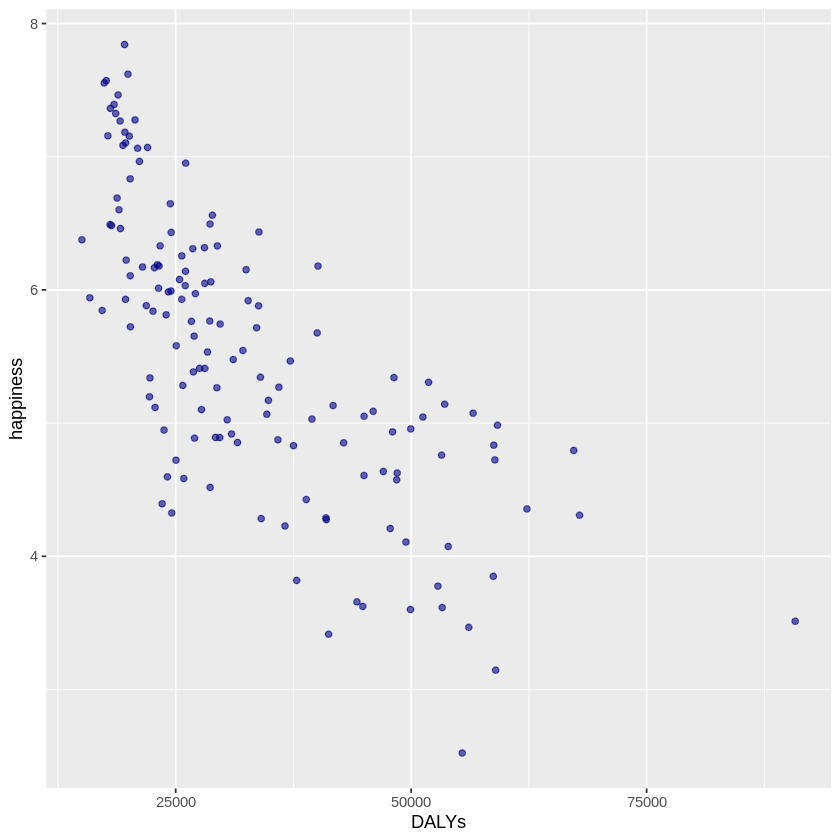

In [14]:
# clean data by converting into numerics
final_df$happiness <- as.numeric(as.character(final_df$happiness)) 
final_df$DALYs <- as.numeric(as.character(final_df$DALYs))
final_df$income <- as.numeric(as.character(final_df$income)) 
final_df$GDP.growth <- as.numeric(as.character(final_df$GDP.growth))
final_df$GDP <- as.numeric(as.character(final_df$GDP))
final_df$gini <- as.numeric(as.character(final_df$gini))
final_df$gni <- as.numeric(as.character(final_df$gni))
final_df$inflation <- as.numeric(as.character(final_df$inflation))
final_df$elderly <- as.numeric(as.character(final_df$elderly))
final_df$population.density <- as.numeric(as.character(final_df$population.density))
final_df$undernourishment <- as.numeric(as.character(final_df$undernourishment))
final_df$unemployment <- as.numeric(as.character(final_df$unemployment))

# descriptive statistics
hist(final_df$happiness) 
hist(final_df$DALYs)
summary(final_df)

# plotting the data
ggplot(final_df, aes(x = DALYs, y = happiness)) +
    geom_point(colour = "navy", alpha = 0.6)

# perform linear regression
fm1 <- lm(happiness ~ DALYs, final_df)   
summary(fm1)
tidy(fm1)

# multivariate regression - adding all controls
fm2 <- lm(happiness ~ DALYs + income + GDP.growth + GDP + gini + gni + inflation + elderly + population.density + undernourishment + unemployment, final_df)   
tidy(fm2)

# exploring the data
print(final_df[order(final_df$happiness, decreasing = FALSE), ])
print(final_df[order(final_df$DALYs, decreasing = FALSE), ])
